In [ ]:
# !git clone https://github.com/eriklindernoren/PyTorch-YOLOv3
# %cd PyTorch-YOLOv3/
# !pip3 install poetry --user
# !poetry install
# !./weights/download_weights.sh
# !pip3 install pytorchyolo --user
# !poetry run yolo-test --weights weights/yolov3.weights

In [ ]:
%cd /app/src

import cv2
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

from pytorchyolo import detect, models

from utils.viz_utils import draw_bounding_boxes


import sys

def include_utils():
    parent_directory = os.path.abspath('/app/utils')
    sys.path.append(parent_directory)

include_utils()


# Load the YOLO model
model = models.load_model(
  "/app/PyTorch-YOLOv3/config/yolov3.cfg",
  "/app/bin/model_files/yolov3.weights")


In [ ]:

# Load the image as a numpy array
img = cv2.imread("/app/data/images/embedding_tester/apple_2.jpg")

with open("/app/PyTorch-YOLOv3/data/coco.names", 'r') as rf:
    classes = rf.read().split('\n')

# Convert OpenCV bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

device = torch.device('cuda')

model.to(device)

# Runs the YOLO model on the image
boxes = detect.detect_image(model, img)

draw_bounding_boxes(img, boxes, classes)

# for box in boxes:
#   img = cv2.rectangle(img, box[:2].astype(int), box[2:4].astype(int), (0,0,0), 10)

plt.imshow(img)

<hr>
<hr>
<h1>EXPERIMENTS WITH MODIFIED SOURCE HERE ON</h1>

In [1]:
%cd /app/src

import cv2
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

from pytorchyolo import detect, models

from utils.viz_utils import draw_bounding_boxes



import sys


with open("/app/PyTorch-YOLOv3/data/coco.names", 'r') as rf:
    classes = rf.read().split('\n')
    
def include_utils():
    parent_directory = os.path.abspath('/app/utils')
    sys.path.append(parent_directory)

include_utils()

# Load the YOLO model
model = models.load_model_own(
  "/app/PyTorch-YOLOv3/config/yolov3.cfg",
  "/app/bin/model_files/yolov3.weights")


device = torch.device('cuda')

model.to(device)

/app/src


Darknet_own(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky_1): LeakyReLU(negative_slope=0.1)
    )
    (2): Sequential(
      (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_3): BatchNorm2d(64, eps=1e-05, m

In [2]:

from pytorchyolo.models import load_model
from pytorchyolo.utils.utils import load_classes, rescale_boxes, non_max_suppression, print_environment_info
from pytorchyolo.utils.datasets import ImageFolder
from pytorchyolo.utils.transforms import Resize, DEFAULT_TRANSFORMS
from pprint import pprint

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator
import torchvision.transforms as transforms

img_size=416
conf_thres=0.5
nms_thres=0.5

model.eval()  # Set model to evaluation mode


img = cv2.imread("/app/data/images/embedding_tester/apple_2.jpg")


# Convert OpenCV bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Configure input
input_img = transforms.Compose([
    DEFAULT_TRANSFORMS,
    Resize(img_size)])(
        (img, np.zeros((1, 5))))[0].unsqueeze(0)

if torch.cuda.is_available():
    input_img = input_img.to("cuda")

# Get detections
with torch.no_grad():
    detections = model(input_img)
    # detections = non_max_suppression(detections, conf_thres, nms_thres)
    # detections = rescale_boxes(detections[0], img_size, img.shape[:2])


In [3]:
type(detections[0])
print(f"num layer outputs : {len(detections[0])}\n")
print(f"num heads = {len(detections[1])}\n")
for ind, i in enumerate(model.module_defs) :
    if i['type'] == 'yolo':
        print(f"\nlayer {ind} : name : {i['type']}\n") 
        print(" details : \n")
        pprint(i)
        print("\n")
    else:
        print(f"layer {ind} : name : {i['type']}") 

num layer outputs : 107

num heads = 3

layer 0 : name : convolutional
layer 1 : name : convolutional
layer 2 : name : convolutional
layer 3 : name : convolutional
layer 4 : name : shortcut
layer 5 : name : convolutional
layer 6 : name : convolutional
layer 7 : name : convolutional
layer 8 : name : shortcut
layer 9 : name : convolutional
layer 10 : name : convolutional
layer 11 : name : shortcut
layer 12 : name : convolutional
layer 13 : name : convolutional
layer 14 : name : convolutional
layer 15 : name : shortcut
layer 16 : name : convolutional
layer 17 : name : convolutional
layer 18 : name : shortcut
layer 19 : name : convolutional
layer 20 : name : convolutional
layer 21 : name : shortcut
layer 22 : name : convolutional
layer 23 : name : convolutional
layer 24 : name : shortcut
layer 25 : name : convolutional
layer 26 : name : convolutional
layer 27 : name : shortcut
layer 28 : name : convolutional
layer 29 : name : convolutional
layer 30 : name : shortcut
layer 31 : name : convo

In [ ]:
# def get_layer_details(model, detections, layer_num):
#     print("layer details : \n")
#     pprint(model.module_defs[layer_num])
#     print(f"\noutput shape : {detections[0][layer_num].shape}")


# img_size=416
# conf_thres=0.5
# nms_thres=0.5

# for ind, head_ind in enumerate([82, 94, 106]):
#     img = cv2.imread("/app/data/images/embedding_tester/apple_2.jpg")   
#     get_layer_details(model, detections, head_ind)
#     head_detections = detections[0][head_ind]
#     print(f"head {ind + 1} : total boxes detected  : {head_detections.shape}")
#     head_detections = non_max_suppression(head_detections, conf_thres, nms_thres)
#     print(f"num boxes post supression : {head_detections[0].shape}")
#     head_detections = rescale_boxes(head_detections[0], img_size, img.shape[:2])
#     boxes = head_detections.numpy()
#     image = draw_bounding_boxes(img, boxes, classes)
#     plt.imshow(image[:, :, ::-1])
#     plt.show()

### the 83nd , 95th and 107th layers are heads <br>

### we will analyse the emebddings corresponding to each of the layers 1 by 1.<br>

### starting with the 1st head : 83rd layer

#### the heads are actually just reshaping layer, that apply the final scaling scaling transforms to convert logits to xyxy conf cls
#### the layers before heads are fully connected linear layers, so these are the ones that actually do the classification and regresssions
#### Therefore, to extract the embeddings we take the the 2nd predecessor of a head, so here, we take 81st layer.


In [ ]:

get_layer_details(model, detections, 80)

raw_embeddings = detections[0][80]
outputs = model.module_list[81](raw_embeddings)

raw_embeddings.max()

In [4]:
def raw_predict(img, input_img_size, raw_outputs, conf_thres, nms_thres, viz = False, reverse_img_for_viz = True):
    head_detections = non_max_suppression(raw_outputs, conf_thres, nms_thres)
    # print(f"num boxes post supression : {head_detections[0].shape}")
    head_detections = rescale_boxes(head_detections[0], input_img_size, img.shape[:2])
    boxes = head_detections.numpy()
    image = draw_bounding_boxes(img, boxes, classes)
    if reverse_img_for_viz:
        image = image[:, :, ::-1]
    if viz:
        plt.imshow()
        plt.show()
    return image, boxes    

def predict_from_embedding(raw_embeddings,
                           model,
                           embeddding_layer_ind,
                           input_img_size,
                           conf_thres,
                           nms_thres,
                           viz = False,
                           reverse_img_for_viz = True):
    outputs = model.module_list[embeddding_layer_ind + 1](raw_embeddings)
    outputs = model.module_list[embeddding_layer_ind + 2][0](outputs, img_size)
    image = raw_predict(img, input_img_size, outputs, conf_thres, nms_thres, viz, reverse_img_for_viz)
    return image


In [ ]:
np.random.rand(3,2) +1

# EMBEDDING OCCULSION VISUALIZATION VIDEO GENERATION

In [ ]:
# from utils.viz_utils import create_frame

# #XXXXXXXXXXXXXXXXXXXXXXXXXX     video details
# # frames,
# # output_path = '/app/bin/outputs/embedding_occulsion_analysis_head_1.mp4'
# output_path = '/app/bin/outputs/temp.mp4'
# fps=5
# frame_size=(800, 400)

# frame_counter = 0

# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Using 'mp4v' for compatibility
# video = cv2.VideoWriter(output_path, fourcc, fps, frame_size)
# #XXXXXXXXXXXXXXXXXXXXXXXXXXX



# embedding_ind = 80 # head 1


# num_rows, num_cols = raw_embeddings.shape[-2:]
# for window_size in range(1,int(round(2*num_rows/3))):
#     for i in range(num_rows-window_size):
#         for j in range(num_cols-window_size):

#             img = cv2.imread("/app/data/images/embedding_tester/apple_2.jpg")   

#             img_size = input_img.size(2)
#             raw_embeddings = detections[0][embedding_ind].clone()

#             raw_embeddings[:,:,i:i+window_size,j:j+window_size] = 0

#             viz_image = predict_from_embedding(raw_embeddings,
#                                     model,
#                                     embedding_ind,
#                                     img_size,
#                                     conf_thres,
#                                     nms_thres)
            
#             raw_embeddings[0, 0, :, :].detach().cpu().numpy()

            
#             frame = create_frame([raw_embeddings[0, 0, :, :].detach().cpu().numpy(), viz_image], ["embedding", "results"], figsize=(10, 5))
            
#             resized_frame = cv2.resize(frame, frame_size)  
#             video.write(resized_frame)

#             frame_counter+=1
#             if frame_counter % 30 == 0:
#                 print(f"{frame_counter} frames over")
                
# video.release()



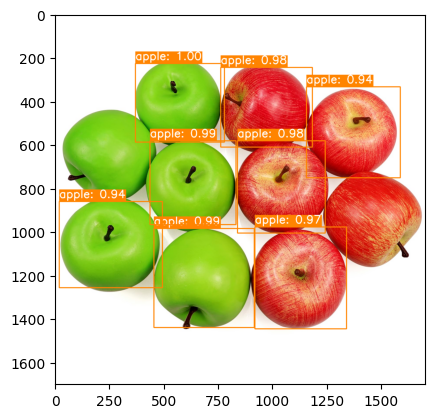

In [260]:
"""
getting pred cell memberships
"""
embeddding_layer_ind = 80
input_img_size = img_size
raw_embeddings = detections[0][embeddding_layer_ind]

outputs = model.module_list[embeddding_layer_ind + 1](raw_embeddings)
outputs = model.module_list[embeddding_layer_ind + 2][0](outputs, img_size)
head_detections = non_max_suppression(outputs, conf_thres, nms_thres)
head_detections = rescale_boxes(head_detections[0], input_img_size, img.shape[:2])
boxes = head_detections.numpy()

vizimg = img.copy()

vizimg = draw_bounding_boxes(vizimg, boxes, classes)
plt.imshow(vizimg)
plt.show()

[131 131]
[[ 524.  393.]
 [ 655. 1179.]
 [ 524.  655.]
 [ 917.  786.]
 [ 917.  393.]
 [1048. 1179.]
 [1310.  524.]
 [ 131. 1048.]]
[[ 655.  524.]
 [ 786. 1310.]
 [ 655.  786.]
 [1048.  917.]
 [1048.  524.]
 [1179. 1310.]
 [1441.  655.]
 [ 262. 1179.]]


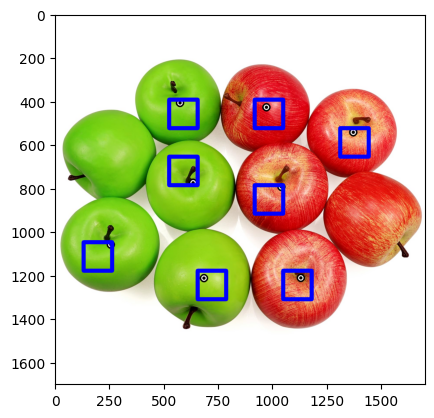

In [262]:
vizimg = img.copy()
batch_size, num_channels , grid_num_rows, grid_num_cols = detections[0][embeddding_layer_ind].shape 

grid_dim_row = int(round(img.shape[0] / grid_num_rows))
grid_dim_col = int(round(img.shape[1] / grid_num_cols))
grid_dims = np.array([grid_dim_col, grid_dim_row])
print(grid_dims)
centers = (boxes[:, 2:4] - boxes[: , :2])/2 + boxes[: , :2]
mem_starts_xy = centers // grid_dims # we need xlength , ylength, not row_length, col_length
mem_cells_mins = mem_starts_xy * grid_dims
print(mem_cells_mins)
mem_cells_maxs = mem_cells_mins + grid_dims
print(mem_cells_maxs)
# mem_cell_boxes = np.concatenate([centers, mem_cells_maxs], axis = 1).astype(int)
mem_cell_boxes = np.concatenate([mem_cells_mins, mem_cells_maxs], axis = 1).astype(int)


for center in centers.astype(int):
    vizimg = cv2.circle(vizimg, (center[0], center[1]), 10, (0,0,0), 17)
    vizimg = cv2.circle(vizimg, (center[0], center[1]), 10, (255,255,255), 3)



for xmin, ymin ,xmax, ymax in mem_cell_boxes.astype(int):
    vizimg = cv2.rectangle(vizimg, (xmin, ymin), (xmax, ymax), (0,0,255), 17)


plt.imshow(vizimg)
plt.show()      



In [243]:
centers

array([[ 574.307  ,  408.01727],
       [ 684.9888 , 1213.1794 ],
       [ 634.1133 ,  775.093  ],
       [1040.1995 ,  794.53625],
       [ 971.76697,  428.47327],
       [1129.0977 , 1212.6583 ],
       [1370.805  ,  543.6766 ],
       [ 256.44894, 1059.5883 ]], dtype=float32)

In [248]:
mem_starts_xy

array([[ 4.,  3.],
       [ 5.,  9.],
       [ 4.,  5.],
       [ 7.,  6.],
       [ 7.,  3.],
       [ 8.,  9.],
       [10.,  4.],
       [ 1.,  8.]])

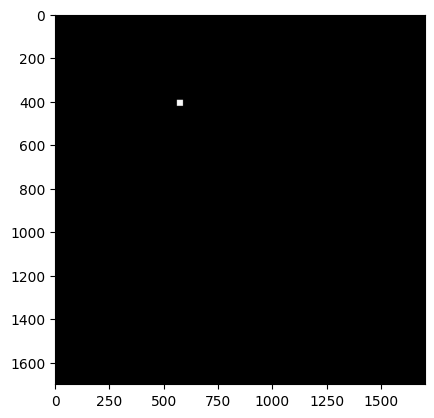

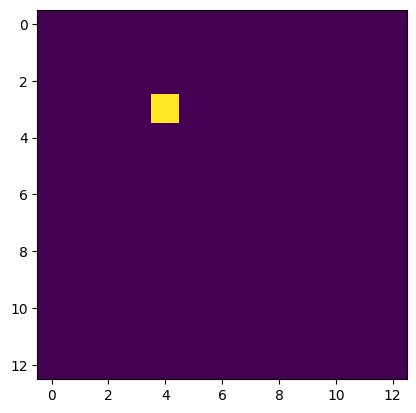

In [251]:
a = np.zeros_like(img)
a[394:422, 560:588] = 250
plt.imshow(a)
plt.show()

a = np.zeros([13,13])
r,c = mem_starts_xy[0][::-1].astype(int)
a[r,c] = 100
plt.imshow(a)
plt.show()

In [258]:
print(centers[:, ::-1] // grid_dims[::-1])
print(mem_starts_xy[:, ::-1])

[[ 3.  4.]
 [ 9.  5.]
 [ 5.  4.]
 [ 6.  7.]
 [ 3.  7.]
 [ 9.  8.]
 [ 4. 10.]
 [ 8.  1.]]
[[ 3.  4.]
 [ 9.  5.]
 [ 5.  4.]
 [ 6.  7.]
 [ 3.  7.]
 [ 9.  8.]
 [ 4. 10.]
 [ 8.  1.]]


[[ 1  2  6  7]
 [ 7  3 12  8]
 [ 3  2  8  7]
 [ 4  5  9 10]
 [ 1  5  6 10]
 [ 7  6 12 11]
 [ 2  8  7 13]
 [ 6  0 11  4]]
[[ 3.  4.]
 [ 9.  5.]
 [ 5.  4.]
 [ 6.  7.]
 [ 3.  7.]
 [ 9.  8.]
 [ 4. 10.]
 [ 8.  1.]]


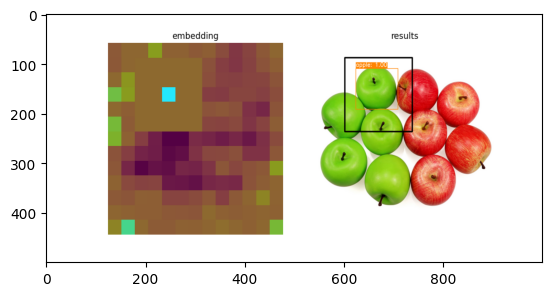

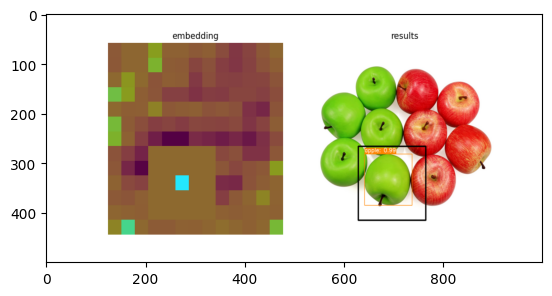

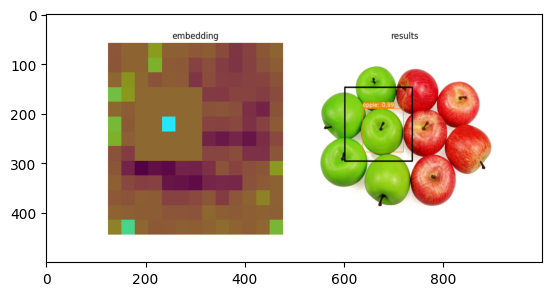

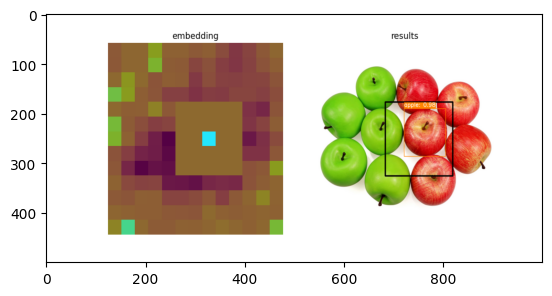

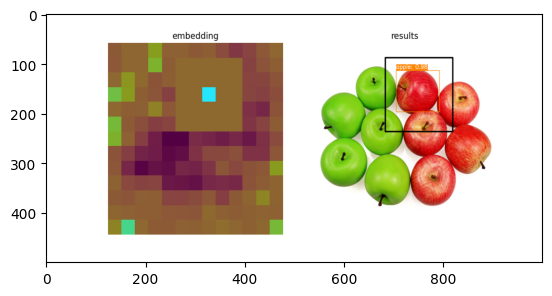

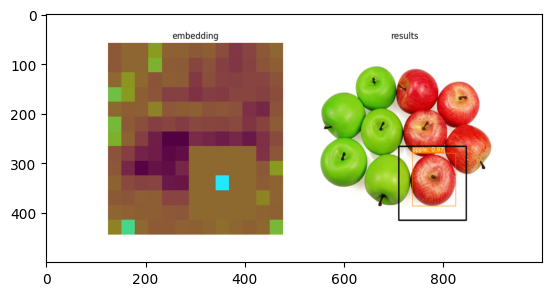

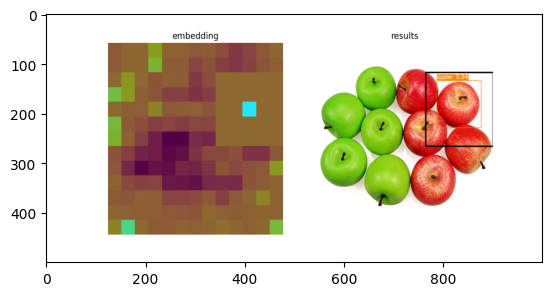

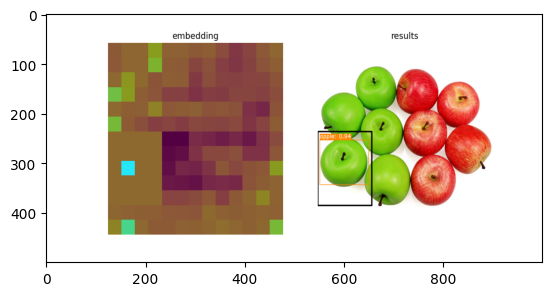

In [294]:
from utils.viz_utils import create_frame

viz = True

batch_size, num_channels , grid_num_rows, grid_num_cols = detections[0][embeddding_layer_ind].shape 

grid_dim_row = int(round(img.shape[0] / grid_num_rows))
grid_dim_col = int(round(img.shape[1] / grid_num_cols))
grid_dims = np.array([grid_dim_col, grid_dim_row])

centers = (boxes[:, 2:4] - boxes[: , :2])/2 + boxes[: , :2]

# from xy to row col
mem_starts_rowcol = centers[:, ::-1] // grid_dims[::-1]

embedding_slice_min = np.maximum(mem_starts_rowcol - 2, np.zeros_like(mem_starts_rowcol)).astype(int)
embedding_slice_max = np.minimum(mem_starts_rowcol + 3, np.ones_like(mem_starts_rowcol) * (grid_dims[::-1] )).astype(int)


#####
viz_embedding = np.concatenate([embedding_slice_min, embedding_slice_max], axis = 1)

print(viz_embedding)
print(mem_starts_rowcol)

raw_embedding = detections[0][80].detach().cpu().numpy()

embeddings = []
for ind, (rowmin, colmin, rowmax, colmax) in enumerate(viz_embedding.astype(int)):
    embeddings.append(raw_embedding[:, :, rowmin:rowmax, colmin:colmax])

    if viz == True:
        
        vizimg = img.copy()
        vizimg = cv2.rectangle(vizimg, (colmin * grid_dim_row, rowmin * grid_dim_col) , (colmax * grid_dim_row , rowmax * grid_dim_col), (0,0,0) , 12)
        vizimg = draw_bounding_boxes(vizimg, boxes[ind][None, ...], classes)

        viz_emb = raw_embedding[0, 0, :, :].copy()
        r, c = mem_starts_rowcol[ind].astype(int)
        viz_emb[rowmin:rowmax, colmin:colmax] = 0.0
        viz_emb[r,c] = 0.75

        frame = create_frame([viz_emb, vizimg[:, :, ::-1]], ["embedding", "results"], figsize=(10, 5))
        plt.imshow(frame)
        plt.show()


In [292]:
embeddings[0].shape

(1, 1024, 5, 5)

In [269]:

mem_starts_rowcol = centers[:, ::-1] // grid_dims[::-1]
embedding_slice_min = np.maximum(mem_starts_rowcol - 2, np.zeros_like(mem_starts_rowcol)).astype(int)
embedding_slice_max = np.minimum(mem_starts_rowcol + 3, np.ones_like(mem_starts_rowcol) * (grid_dims[::-1] )).astype(int)

viz_embedding = np.concatenate([embedding_slice_min, embedding_slice_max], axis = 1)



NameError: name 'raw_embedding' is not defined

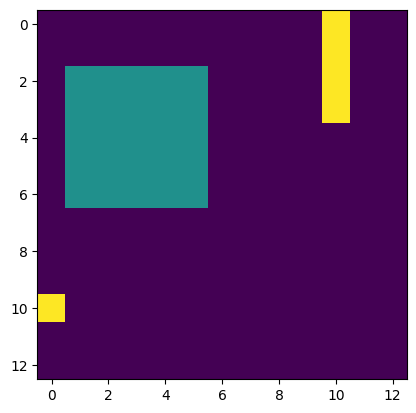

In [235]:


a = np.zeros([13,13])
(rowmin, colmin), (rowmax, colmax) = embedding_slice_min[0] , embedding_slice_max[0]
r, c = mem_starts_rowcol[0].astype(int)
a[rowmin:rowmax, colmin:colmax] = 50
a[0:4,10] = 100
a[10, 0] = 100
plt.imshow(a)
plt.show()

In [224]:
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


# def create_frame(images, titles, figsize=(10, 5)):
#     layout = (1, len(images))  # Change layout to have enough spots for each image
    
#     total_subplots = layout[0] * layout[1]

#     fig, axs = plt.subplots(layout[0], layout[1], figsize=figsize)
#     axs = axs.flatten() if layout[0] * layout[1] > 1 else [axs]
    
#     # Hide any unused subplots
#     for ax in axs[len(images):]:
#         ax.axis('off')
    
#     for ax, img, title in zip(axs[:len(images)], images, titles):
#         ax.imshow(img, aspect='auto')
#         ax.set_title(title)
#         ax.axis('off')
    
#     # plt.subplots_adjust(wspace=0.1, hspace=0.2)  # Adjust spacing to prevent overlap
    
#     canvas = FigureCanvas(fig)
#     canvas.draw()
#     frame = np.array(canvas.renderer.buffer_rgba())
#     plt.close(fig)
    
#     frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)
#     return frame



# def create_video(frames, output_path='output_video.mp4', fps=10, frame_size=(1920, 1080)):
#     fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Using 'mp4v' for compatibility
#     video = cv2.VideoWriter(output_path, fourcc, fps, frame_size)

#     for frame in frames:
#         resized_frame = cv2.resize(frame, frame_size)  # Resize to ensure compatibility
#         video.write(resized_frame)
    
#     video.release()

# # Example usage
# images = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(20)]
# titles = ['Image 1', 'Image 2', 'Image 3', 'Image 4']

# frames = [create_frame([img, img],titles,  figsize=(8, 8)) for img in images]

# create_video(frames, 'output_video.mp4', fps=5, frame_size=(800, 400))


